In [1]:
import numpy as np
import tree
from option import Option

# Example usage:
S0 = 100  # Initial stock price
K = 110 # Strike
T = 1   # Number of years
vol = 0.2 # Volatility
r = 0.05  # Risk-free rate (5%)
n = 3 # Number of periods (levels) in tree

In [2]:
put = Option(S0, K, T, vol, r, n, option_type='put')
# put_price = put.price
# print(f'The price of the put is: ${np.round(put_price, 2)}')
# put.price_tree.print_text_tree()

In [3]:
call = Option(52, 50, 0.25, 0.2, 0.05, 3)
# print(call.price)

In [4]:
under_levels = call.underlying.tree.get_tree_levels(call.underlying.tree.root)
# call.underlying.tree.print_text_tree()
# print(under_levels)

In [5]:
test_levels_call = call.calculate_option_prices()
test_levels_put = put.calculate_option_prices()
# print(test_levels_call)
# print(test_levels_put)

In [6]:
# call.calculate_option_prices()

In [7]:
# call.calculate_option_deltas()

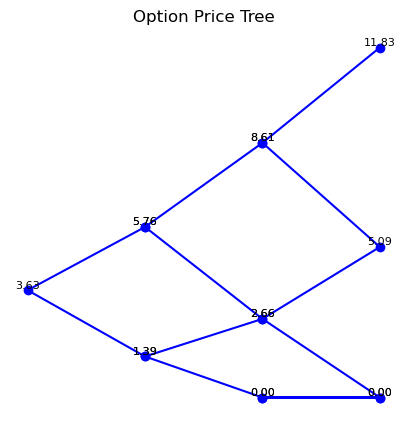

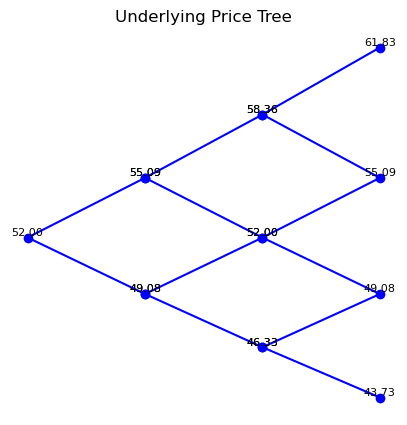

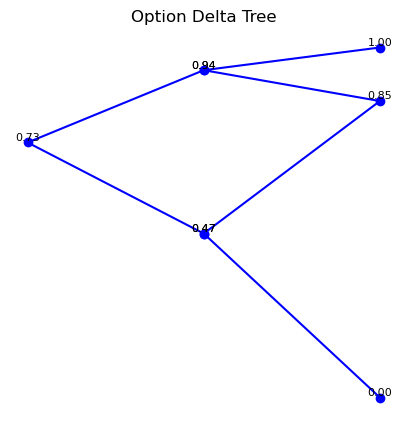

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix

def plot_tree(levels, type):
    nb_steps = len(levels.keys())-1
    
    mat = lil_matrix((nb_steps+1, nb_steps*2+1), dtype = np.float32)
    
    for i in range(nb_steps+1):
        value = levels[i]
        rows = np.zeros(i+1, dtype=np.int16) + i
        cols = np.arange(i+1)*2+nb_steps-i
        mat[rows, cols] = value
    
    fig = plt.figure(figsize=[5, 5])
    
    plt.axis('off')
    plt.title(f'{type} Tree')
    
    for i in range(nb_steps):
        x = (np.arange(3 + i*2) % 2 == 0) + i
        y = np.arange(0, 2*(i+1)+1) - 1 + (nb_steps-i)
        v = mat[x, y].toarray()[0]
        plt.plot(x, v, 'bo-')
    
        for xi, vi in zip(x, v):
            plt.text(xi, vi, f'{vi:.2f}', fontsize=8, ha='center', va='bottom')

plot_tree(test_levels_call, 'Option Price')
plot_tree(under_levels, 'Underlying Price')
plot_tree(call.delta_tree, 'Option Delta')